## 词云

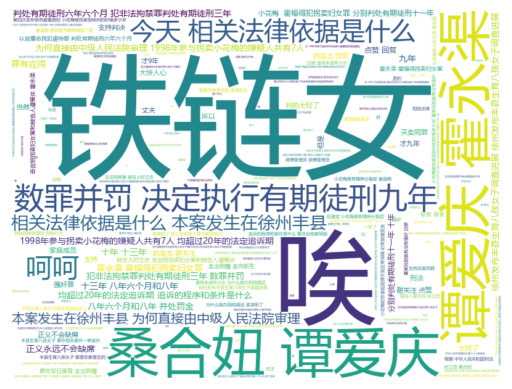

In [9]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 读取数据
weibo_df = pd.read_excel('data.xlsx')

# 合并文本
weibo_df.dropna(subset=['texts'], inplace=True)
text = ' '.join(weibo_df['texts'].str.replace('转发微博', ''))

# 中文分词
cut_text = ' '.join(jieba.cut(text))

# 创建词云对象
wordcloud = WordCloud(background_color="white", width=800, height=600, font_path="msyh.ttc").generate(text)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [10]:
# 保存输出
wordcloud.to_file("output/wordcloud.png")

## 情感极性：基于cemotion

In [9]:
from cemotion import Cemotion
import pandas as pd
from tqdm import tqdm

c:\Users\yym20\anaconda3\envs\NLP\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
weibo_df = pd.read_excel('data.xlsx')
c = Cemotion()

If you are using China Telecom, you may only get faster download speeds during the day.


cemotion_2.0.pt: 409MB [00:59, 6.92MB/s]                              


In [13]:
sentiment_polar = []
for i in tqdm(weibo_df['texts']):
    try:
        a = c.predict(i)
    except:
        a = 'error'
    sentiment_polar.append(a)

100%|██████████| 6694/6694 [24:55<00:00,  4.48it/s]


In [15]:
weibo_df['sentiment_polar'] = sentiment_polar

In [16]:
weibo_df.to_excel('data_cemotion.xlsx',encoding='utf-8')

In [24]:
print(len(weibo_df))
print(f"positive: {len(weibo_df[weibo_df['sentiment_polar']>=0.5])}")
print(f"negative: {len(weibo_df[weibo_df['sentiment_polar']<0.5])}")


6694
positive: 2777
negative: 3829


## 情感分类：基于情感词典

In [1]:
import pandas as pd
import jieba
import time

In [2]:
# 获取数据集
weibo_df = pd.read_excel('data.xlsx')


# 情感词典读取
# 注意：
# 1.词典中怒的标记(NA)识别不出被当作空值,情感分类列中的NA都给替换成NAU
# 2.大连理工词典中有情感分类的辅助标注(有NA),故把情感分类列改好再替换原词典中

df = pd.read_excel('dictionary/大连理工大学中文情感词汇本体NAU.xlsx')
df = df[['词语', '词性种类', '词义数', '词义序号', '情感分类', '强度', '极性']]
df.head(10)

,词语,词性种类,词义数,词义序号,情感分类,强度,极性
0,脏乱,adj,1.0,1.0,NN,7,2
1,糟报,adj,1.0,1.0,NN,5,2
2,早衰,adj,1.0,1.0,NE,5,2
3,责备,verb,1.0,1.0,NN,5,2
4,贼眼,noun,1.0,1.0,NN,5,2
5,战祸,noun,1.0,1.0,ND,5,2
6,招灾,adj,1.0,1.0,NN,5,2
7,折辱,noun,1.0,1.0,NE,5,2
8,中山狼,noun,1.0,1.0,NN,5,2
9,清峻,adj,1.0,1.0,PH,5,0


In [3]:
# 七种情绪的运用
Happy = []
Good = []
Surprise = []
Anger = []
Sad = []
Fear = []
Disgust = []

# 迭代遍历每一行
for idx, row in df.iterrows():
    if row['情感分类'] in ['PA', 'PE']:
        Happy.append(row['词语'])
    if row['情感分类'] in ['PD', 'PH', 'PG', 'PB', 'PK']:
        Good.append(row['词语']) 
    if row['情感分类'] in ['PC']:
        Surprise.append(row['词语'])       
    if row['情感分类'] in ['NB', 'NJ', 'NH', 'PF']:
        Sad.append(row['词语'])
    if row['情感分类'] in ['NI', 'NC', 'NG']:
        Fear.append(row['词语'])
    if row['情感分类'] in ['NE', 'ND', 'NN', 'NK', 'NL']:
        Disgust.append(row['词语'])
    if row['情感分类'] in ['NAU']:     #修改: 原NA算出来没结果
        Anger.append(row['词语'])  

# 自由制定规则       
Positive = Happy + Good + Surprise
Negative = Anger + Sad + Fear + Disgust
print(Anger)

['忿忿不平', '怒火冲天', '气愤愤', '失落', '愤懑', '悲愤', '勃然大怒', '含怒', '恼羞成怒', '忿怒', '七窍生烟', '发标', '怒容', '吹胡子', '唱老生的生气－吹胡子瞪眼镜', '暴跳如雷', '戟指怒目', '怒形于色', '怒目切齿', '敢怒不敢言', '除恶务尽', '逼上梁山', '阴沉', '急眼', '看扁', '气鼓鼓', '投诉', '令人生气', '没好气', '民怨沸腾', '悲愤交加', '大动肝火', '火气', '怒不可遏', '惹气', '窝火', '光火', '无明火', '耍态度', '触怒', '怒色', '犯肝气', '吃了芋头不下肚－顶心顶肺', '勃然变色', '雷霆之怒', '拍案而起', '切齿愤盈', '我靠', 'kao', 'gun', '吵嘴', '羞愤', '气急败坏', '嗟来之食', '火暴', '气忿', '无名火起', '愤愤不平', '暴怒', '愤怒', '恼火', '气冲冲', '义愤', '挂气', '愤愤', '私愤', '赌气', '横眉', '一刀两段', '一气一个死', '火箭筒射击－两头冒火', '怫然作色', '怒气冲冲', '义愤填膺', '上等轮胎－有气难出', '睚眦', '可气', '当场出彩', '针锋相对', 'TNND', '滚出去', '哇靠', '郁怒', '疾言厉色', '火冒三丈', '义形于色', '忿忿', '抗议', '面有愠色', '气忿忿', '割席断交', '天怒人怨', '悲愤填膺', '郁愤', '纳鞋底戳了手－真气人', '愤世嫉俗', '愤然', '恼怒', '气愤', '震怒', '动肝火', '悻然', '负气', '横眉怒目', '奇耻大辱', '草场着火－火气冲天', '怒气冲天', '气呼呼', 'MD', '真TM', '你丫', '嗔怒', '叱呵', '不甘示弱', '寒碜', '抱不平', '来气', '气汹汹', '竟敢', '愤激', '气不忿', '忧愤', '愤慨', '民愤', '怒视', '易怒', '动气', '大发雷霆', '公愤', '泄愤', '怒目', '一刀两断', '三尸暴跳，七窍生烟', '皇上拍桌子－盛怒', '艴然不悦', '怒目而视', '

In [4]:
# 中文分词
# 可添加自定义词典和停用词
#jieba.load_userdict("user_dict.txt")
stop_list = pd.read_csv('dictionary/stop_words.txt',
                        engine='python',
                        encoding='utf-8',
                        delimiter="\n",
                        names=['t'])

#获取重命名t列的值
stop_list = stop_list['t'].tolist()

def txt_cut(juzi):
    return [w for w in jieba.lcut(juzi) if w not in stop_list]     #可增加len(w)>1

# 情感计算
def emotion_caculate(text):
    positive = 0
    negative = 0
    
    anger = 0
    disgust = 0
    fear = 0
    sad = 0
    surprise = 0
    good = 0
    happy = 0

    anger_list = []
    disgust_list = []
    fear_list = []
    sad_list = []
    surprise_list = []
    good_list = []
    happy_list = []
    
    wordlist = txt_cut(text)
    #wordlist = jieba.lcut(text)
    wordset = set(wordlist)
    # wordfreq = []
    for word in wordset:
        freq = wordlist.count(word)
        if word in Positive:
            positive += freq
        if word in Negative:
            negative += freq
        if word in Anger:
            anger += freq
            anger_list.append(word)
        if word in Disgust:
            disgust += freq
            disgust_list.append(word)
        if word in Fear:
            fear += freq
            fear_list.append(word)
        if word in Sad:
            sad += freq
            sad_list.append(word)
        if word in Surprise:
            surprise += freq
            surprise_list.append(word)
        if word in Good:
            good += freq
            good_list.append(word)
        if word in Happy:
            happy += freq
            happy_list.append(word)
            
    emotion_info = {
        'length':len(wordlist),
        'positive': positive,
        'negative': negative,
        'anger': anger,
        'disgust': disgust,
        'fear':fear,
        'good':good,
        'sadness':sad,
        'surprise':surprise,
        'happy':happy,
        
    }

    indexs = ['length', 'positive', 'negative', 'anger', 'disgust','fear','sadness','surprise', 'good', 'happy']
    return pd.Series(emotion_info, index=indexs)

In [5]:
# 测试
text = """
原著的确更吸引编剧读下去，所以跟《诛仙》系列明显感觉到编剧只看过故事大纲比，这个剧的编剧完整阅读过小说。
配乐活泼俏皮，除了强硬穿越的台词轻微尴尬，最应该尴尬的感情戏反而入戏，故意模糊了陈萍萍的太监身份、太子跟长公主的暧昧关系，
整体观影感受极好，很期待第二季拍大东山之役。玩弄人心的阴谋阳谋都不狗血，架空的设定能摆脱历史背景，服装道具能有更自由的发挥空间，
特别喜欢庆帝的闺房。以后还是少看国产剧，太长了，还是精短美剧更适合休闲，追这个太累。王启年真是太可爱了。
"""

res = emotion_caculate(text)
print(res)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yym20\AppData\Local\Temp\jieba.cache
Loading model cost 0.925 seconds.
Prefix dict has been built successfully.


length      88
positive     7
negative     6
anger        0
disgust      6
fear         0
sadness      0
surprise     0
good         6
happy        1
dtype: int64


In [6]:
# 情感计算
emotion_df = weibo_df['texts'].astype(str).apply(emotion_caculate)
emotion_df.head()

,length,positive,negative,anger,disgust,fear,sadness,surprise,good,happy
0,37,1,1,0,1,0,0,0,1,0
1,9,0,1,0,0,1,0,0,0,0
2,11,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0


In [7]:
# 输出结果
output_df = pd.concat([weibo_df, emotion_df], axis=1)
output_df.to_excel('output/data_emo_classify.xlsx')

In [9]:
len(output_df)

6694